### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the csv file as a dataframe

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\titles.csv\titles.csv")

In [3]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [4]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


### Data Cleaning

In [6]:
df['seasons'] = df['seasons'].fillna(0)
df['imdb_score'] = df['imdb_score'].fillna(df['imdb_score'].mean())
df['imdb_votes'] = df['imdb_votes'].fillna(df['imdb_votes'].median())
df['tmdb_popularity'] = df['tmdb_popularity'].fillna(df['tmdb_popularity'].median())
df['tmdb_score'] = df['tmdb_score'].fillna(df['tmdb_score'].mean())
df2 = df.drop(['imdb_id','description','age_certification'],axis=1)
df2.head()

,id,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,51,['documentation'],['US'],1.0,6.510861,2233.5,0.600,6.829175
1,tm84618,Taxi Driver,MOVIE,1976,114,"['drama', 'crime']",['US'],0.0,8.200000,808582.0,40.965,8.179000
2,tm154986,Deliverance,MOVIE,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,7.700000,107673.0,10.010,7.300000
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,8.200000,534486.0,15.461,7.811000
4,tm120801,The Dirty Dozen,MOVIE,1967,150,"['war', 'action']","['GB', 'US']",0.0,7.700000,72662.0,20.398,7.600000


In [10]:
df2 = df2.dropna()

In [13]:
df2.isna().sum()

id                      0
title                   0
type                    0
release_year            0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [14]:
df2.shape

(5849, 12)

In [15]:
type_ = df['type'].value_counts()
type_

MOVIE    3744
SHOW     2106
Name: type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

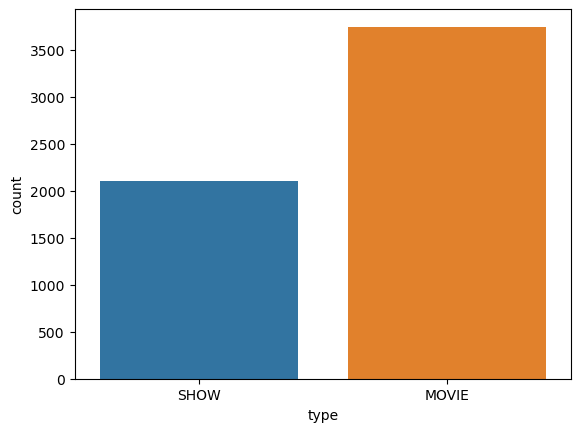

<Figure size 600x600 with 0 Axes>

In [16]:
sns.countplot(data=df2,x='type')
plt.figure(figsize=(6,6))
plt.show

In [ ]:
'''plt.bar(type_.index,type_.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Countplot of Type')
plt.show()'''

In [19]:
df2.dtypes

id                       object
title                    object
type                     object
release_year              int64
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5849 entries, 0 to 5849
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5849 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5849 non-null   object 
 3   release_year          5849 non-null   int64  
 4   runtime               5849 non-null   int64  
 5   genres                5849 non-null   object 
 6   production_countries  5849 non-null   object 
 7   seasons               5849 non-null   float64
 8   imdb_score            5849 non-null   float64
 9   imdb_votes            5849 non-null   float64
 10  tmdb_popularity       5849 non-null   float64
 11  tmdb_score            5849 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 594.0+ KB


In [22]:
df2.drop_duplicates()

,id,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,51,['documentation'],['US'],1.0,6.510861,2233.5,0.600,6.829175
1,tm84618,Taxi Driver,MOVIE,1976,114,"['drama', 'crime']",['US'],0.0,8.200000,808582.0,40.965,8.179000
2,tm154986,Deliverance,MOVIE,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,7.700000,107673.0,10.010,7.300000
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,8.200000,534486.0,15.461,7.811000
4,tm120801,The Dirty Dozen,MOVIE,1967,150,"['war', 'action']","['GB', 'US']",0.0,7.700000,72662.0,20.398,7.600000
...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,2021,100,"['romance', 'drama']",['NG'],0.0,6.800000,45.0,1.466,6.829175
5846,tm898842,C/O Kaadhal,MOVIE,2021,134,['drama'],[],0.0,7.700000,348.0,6.821,6.829175
5847,tm1059008,Lokillo,MOVIE,2021,90,['comedy'],['CO'],0.0,3.800000,68.0,26.005,6.300000
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,2021,37,[],['US'],0.0,6.510861,2233.5,1.296,10.000000


### No duplicates records found

In [25]:
df2['genres'] = df2['genres'].to_numpy().astype(str)
df2['production_countries'] = df2['production_countries'].to_numpy().astype(str)
df2.head()

,id,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,51,['documentation'],['US'],1.0,6.510861,2233.5,0.600,6.829175
1,tm84618,Taxi Driver,MOVIE,1976,114,"['drama', 'crime']",['US'],0.0,8.200000,808582.0,40.965,8.179000
2,tm154986,Deliverance,MOVIE,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,7.700000,107673.0,10.010,7.300000
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,8.200000,534486.0,15.461,7.811000
4,tm120801,The Dirty Dozen,MOVIE,1967,150,"['war', 'action']","['GB', 'US']",0.0,7.700000,72662.0,20.398,7.600000


### Action Movies

In [27]:
df2[df2['genres'].str.contains('action')]

,id,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2,tm154986,Deliverance,MOVIE,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,7.7,107673.0,10.010,7.300000
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,8.2,534486.0,15.461,7.811000
4,tm120801,The Dirty Dozen,MOVIE,1967,150,"['war', 'action']","['GB', 'US']",0.0,7.7,72662.0,20.398,7.600000
7,tm14873,Dirty Harry,MOVIE,1971,102,"['thriller', 'action', 'crime']",['US'],0.0,7.7,155051.0,12.817,7.500000
8,tm119281,Bonnie and Clyde,MOVIE,1967,110,"['crime', 'drama', 'action']",['US'],0.0,7.7,112048.0,15.687,7.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
5733,ts289982,Bangkok Breaking,SHOW,2021,60,"['thriller', 'action', 'crime', 'drama']",['TH'],1.0,5.8,294.0,28.627,7.000000
5738,ts317709,Kayko and Kokosh,SHOW,2021,15,"['animation', 'comedy', 'fantasy', 'action']",['PL'],2.0,6.3,324.0,3.432,6.700000
5770,tm1098060,Shadow Parties,MOVIE,2021,116,"['action', 'drama', 'thriller']",['NG'],0.0,6.2,9.0,1.286,6.829175
5794,tm986017,Gatao: The Last Stray,MOVIE,2021,120,"['action', 'crime', 'drama', 'romance']",['TW'],0.0,5.9,266.0,3.141,4.900000


### There are 1157 action movies present in the dataset.Similarly,movies of other genres can also be found.

## EXPLORATORY DATA ANALYSIS

<Axes: >

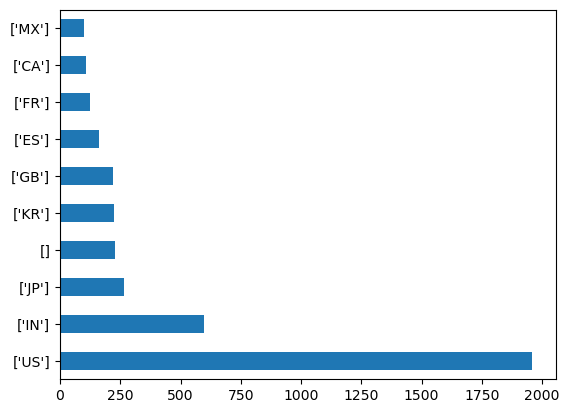

In [29]:
df2['production_countries'].value_counts()[:10].plot(kind='barh')

### United States, India, Japan are the top 3 Netflix production countries.

### MOVIE & SHOW distribution in India

<Axes: >

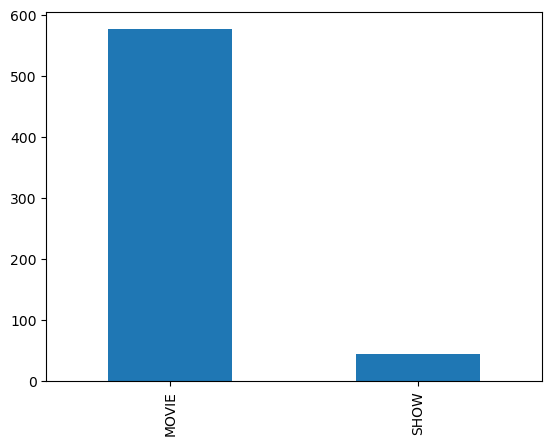

In [34]:
df2[df2['production_countries'].str.contains('IN')].type.value_counts().plot(kind='bar')

### Before any further action, let us split dataframe into MOVIE & SHOW types.

In [37]:
dfm = df[df['type']=='MOVIE']
dfs = df[df['type']=='SHOW']

## Frequency plot of number of seasons

<Axes: >

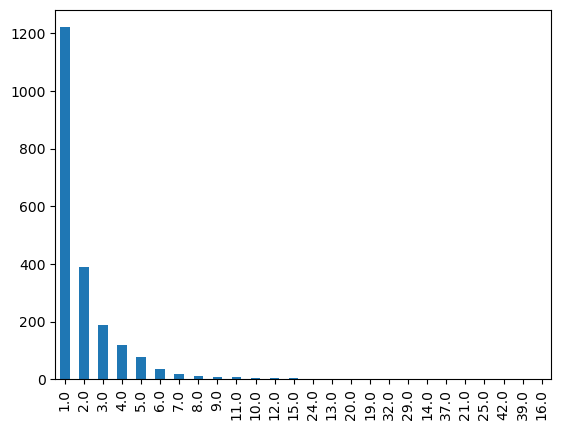

In [38]:
dfs['seasons'].value_counts().plot(kind='bar')

### A large number of shows are having 1 season,one-third of that having 2 seasons & half of the later having three seasons

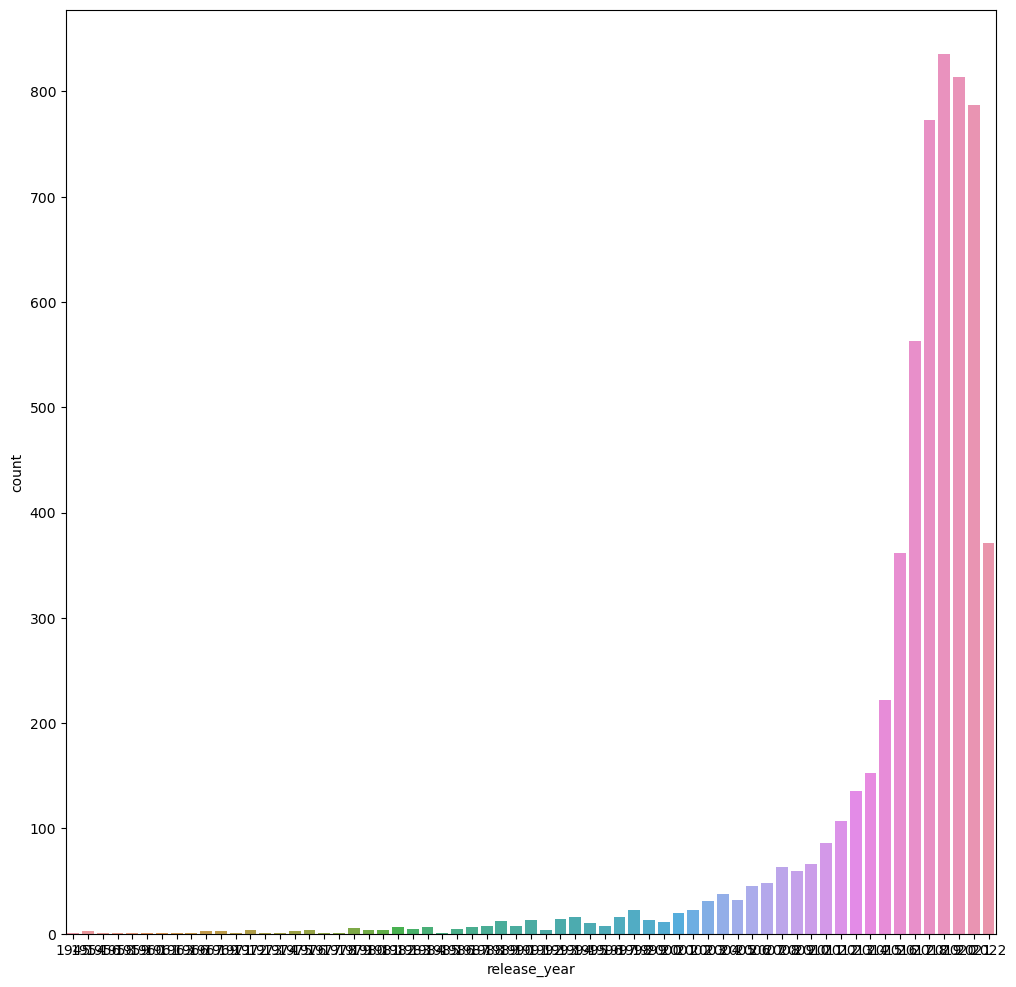

In [39]:
plt.figure(figsize=(12,12))
sns.countplot(x='release_year',data=df2)
plt.show()

### There is significant growth in number of content that is being created or released in the past 5 years

<Axes: xlabel='imdb_score', ylabel='tmdb_score'>

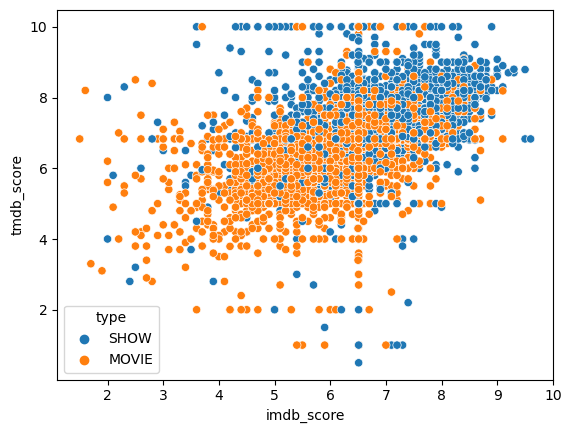

In [40]:
sns.scatterplot(x='imdb_score',y='tmdb_score',hue='type',data=df2)

### There is a general trend of SHOWS having higher imdb score & tmdb score than MOVIES.

<Figure size 1200x1200 with 0 Axes>

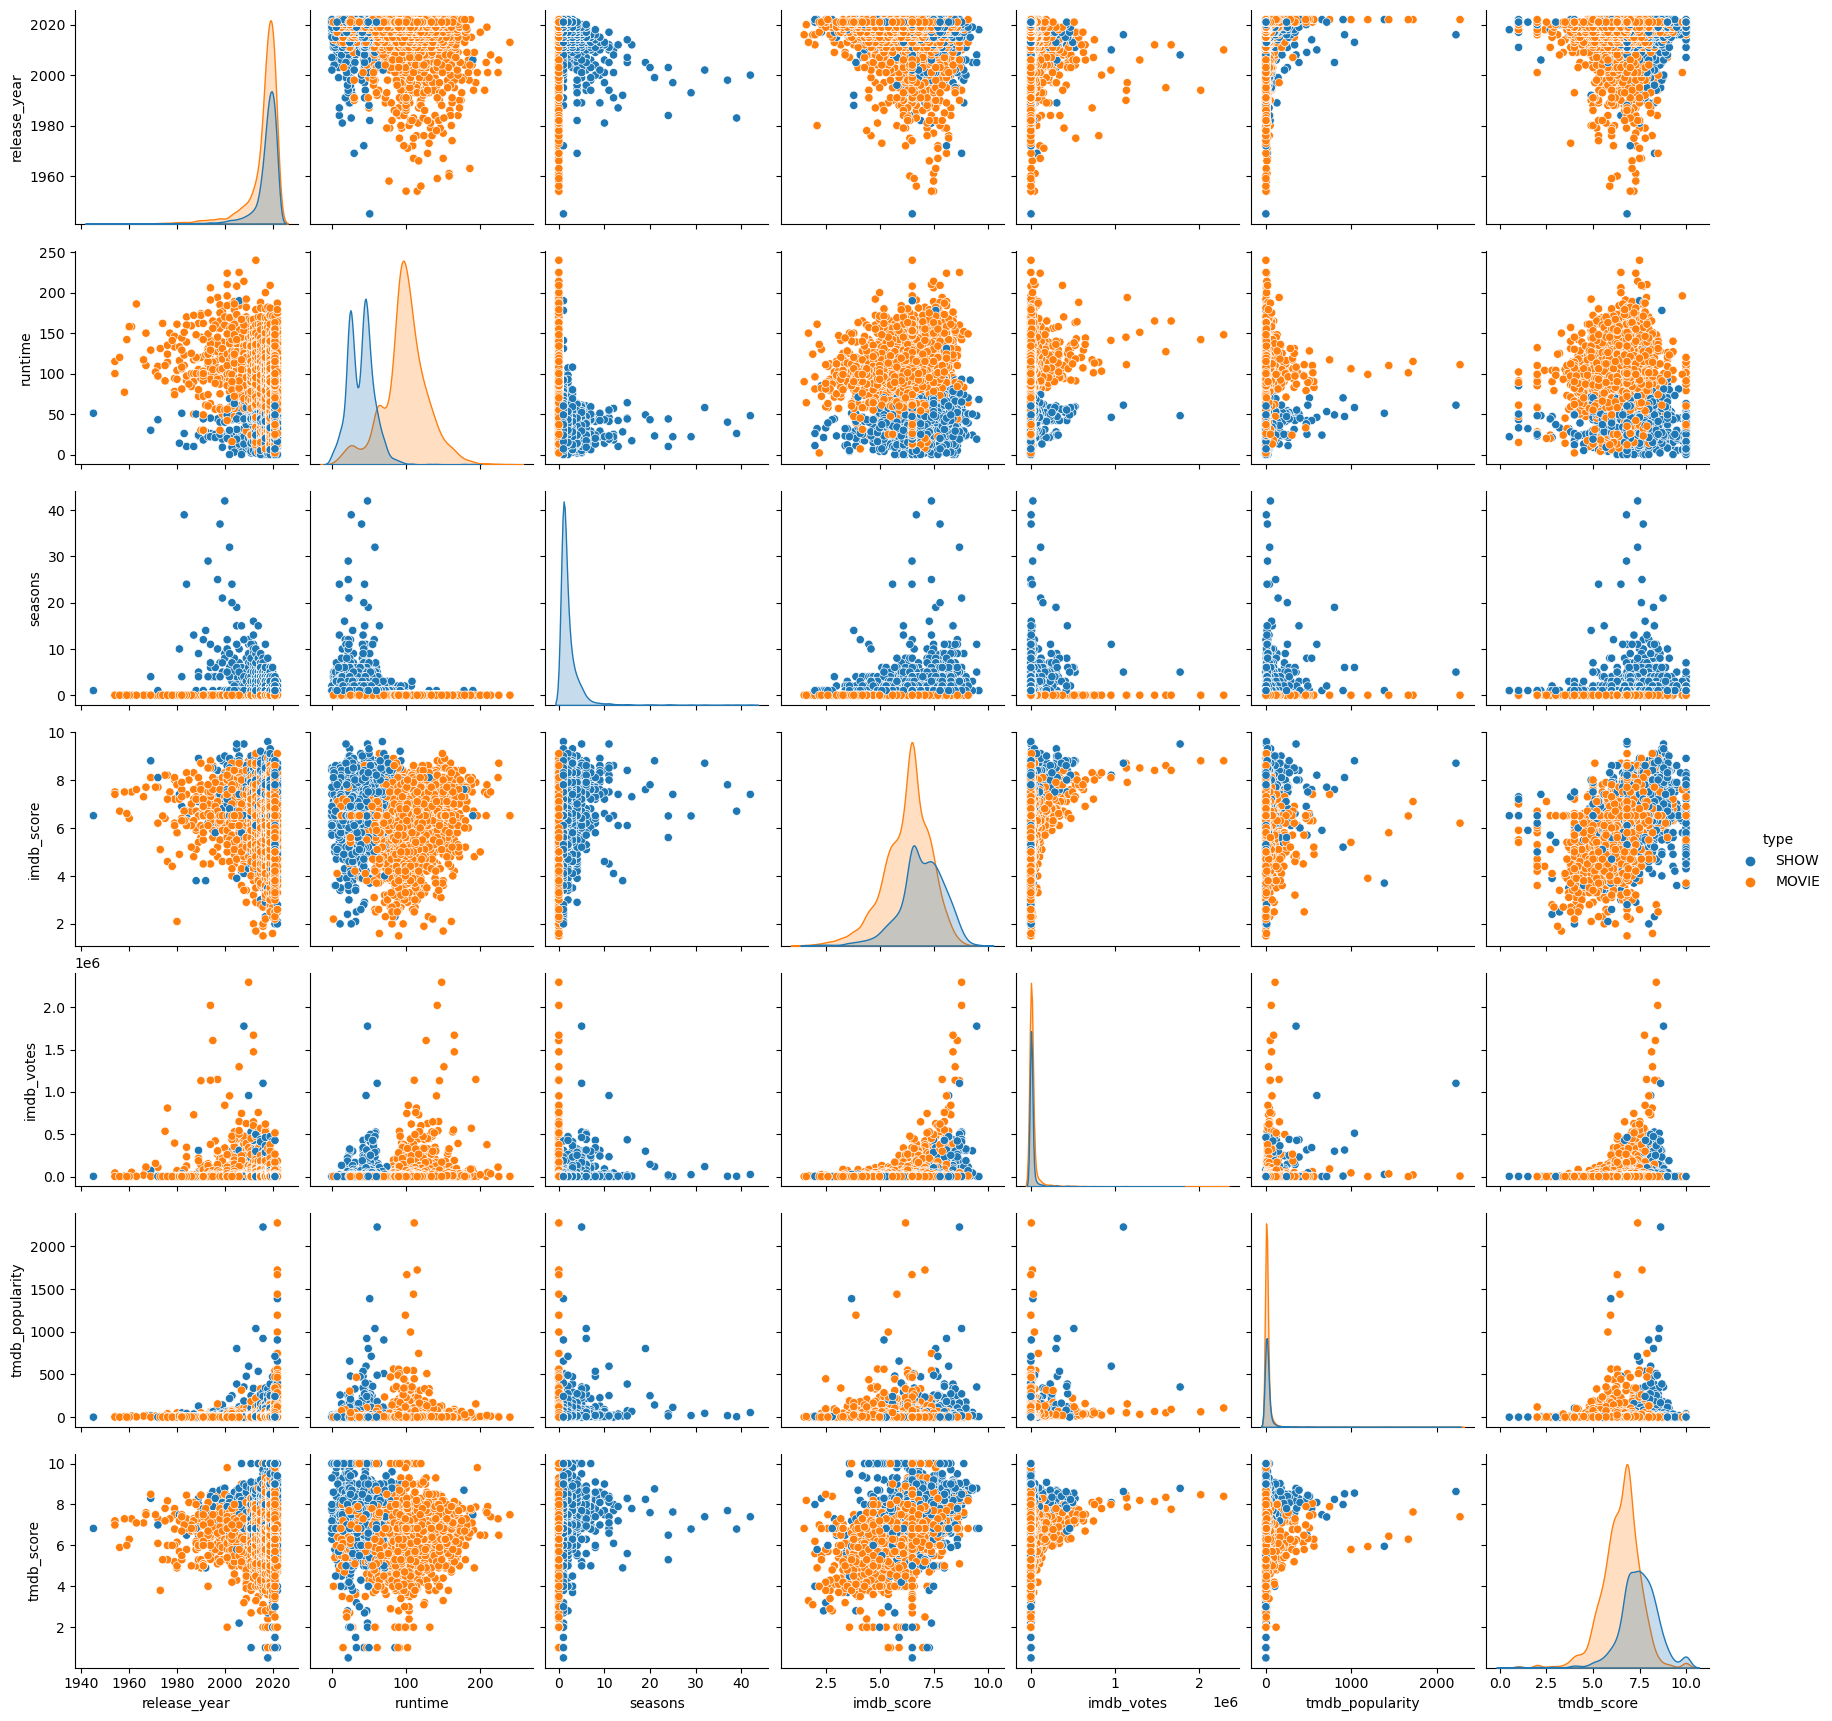

In [41]:
plt.figure(figsize=(12,12))
sns.pairplot(data=df2, hue="type")
plt.show()

### This pairplot gives us the key insights regarding SHOWS & MOVIES. 1) There is significant increase in both SHOW & MOVIE in past 5 years. 2) tmdb_popularity of MOVIE is significantly higher than SHOW. 3) imdb_score & tmdb_score for MOVIE is comparatively less. 4) runtime of movies is larger than most of the shows.

## CONCLUSION

### United States, India, Japan are the top 3 Netflix production countries.
### There is significant increase in both SHOW & MOVIE in past 5 years.
### tmdb_popularity of MOVIE is significantly higher than SHOW.
### imdb_score & tmdb_score for MOVIE is comparatively less.